In [4]:
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pdr
import matplotlib.pyplot as plt
import mplcyberpunk
import pandas as pd
import seaborn




petra = web.get_data_yahoo( 'PETR4.SA', start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2022, 10, 26) )
petra

ModuleNotFoundError: No module named 'pandas_datareader'

<AxesSubplot: xlabel='Date'>

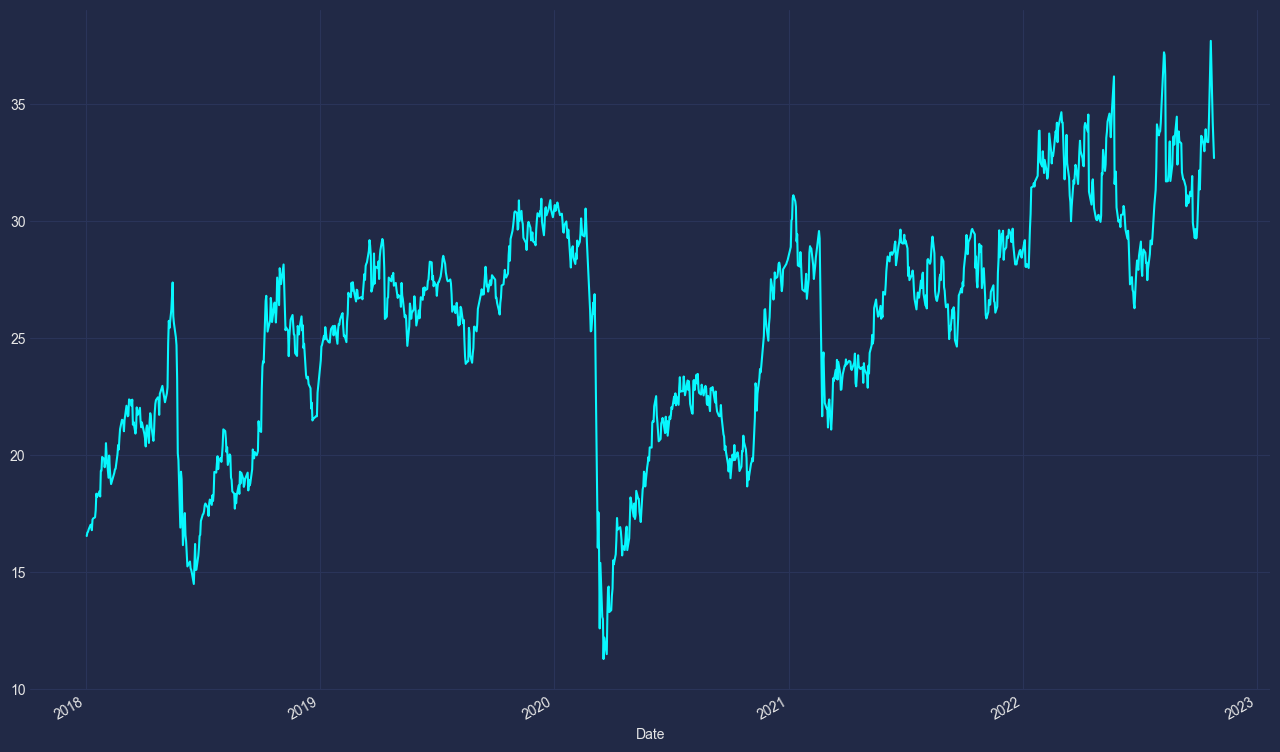

In [42]:
petra['Close'].plot( figsize=(16,10) )

In [43]:
petra_sa = petra.loc['2021-01':'2022-10'].copy()
petra_sa.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-20,36.549999,35.770000,36.099998,36.470001,114347400.0,36.470001
2022-10-21,38.389999,36.389999,36.450001,37.720001,139601400.0,37.720001
2022-10-24,36.820000,34.230000,36.500000,34.250000,142110900.0,34.250000
2022-10-25,34.500000,33.209999,34.040001,33.529999,113161200.0,33.529999
2022-10-26,33.529999,31.900000,32.599998,32.709999,121334800.0,32.709999


In [44]:
# Média Móvel dos ultimos 30 dias
petra_sa['MMS30'] = petra_sa['Close'].rolling( window=30 ).mean()
petra_sa.head(50)

petra_sa = petra_sa.drop('MMS30', axis=1)

In [45]:
petra_sa = petra_sa.fillna(0)
petra_sa.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,29.18,28.530001,28.650000,28.910000,74719700.0,15.694896
2021-01-05,30.18,28.240000,28.900000,30.040001,95181100.0,16.308359
2021-01-06,30.90,30.049999,30.160000,30.100000,96562500.0,16.340931
2021-01-07,31.15,30.340000,30.340000,31.000000,56171300.0,16.829531
2021-01-08,31.76,30.350000,31.459999,31.120001,67136300.0,16.894680


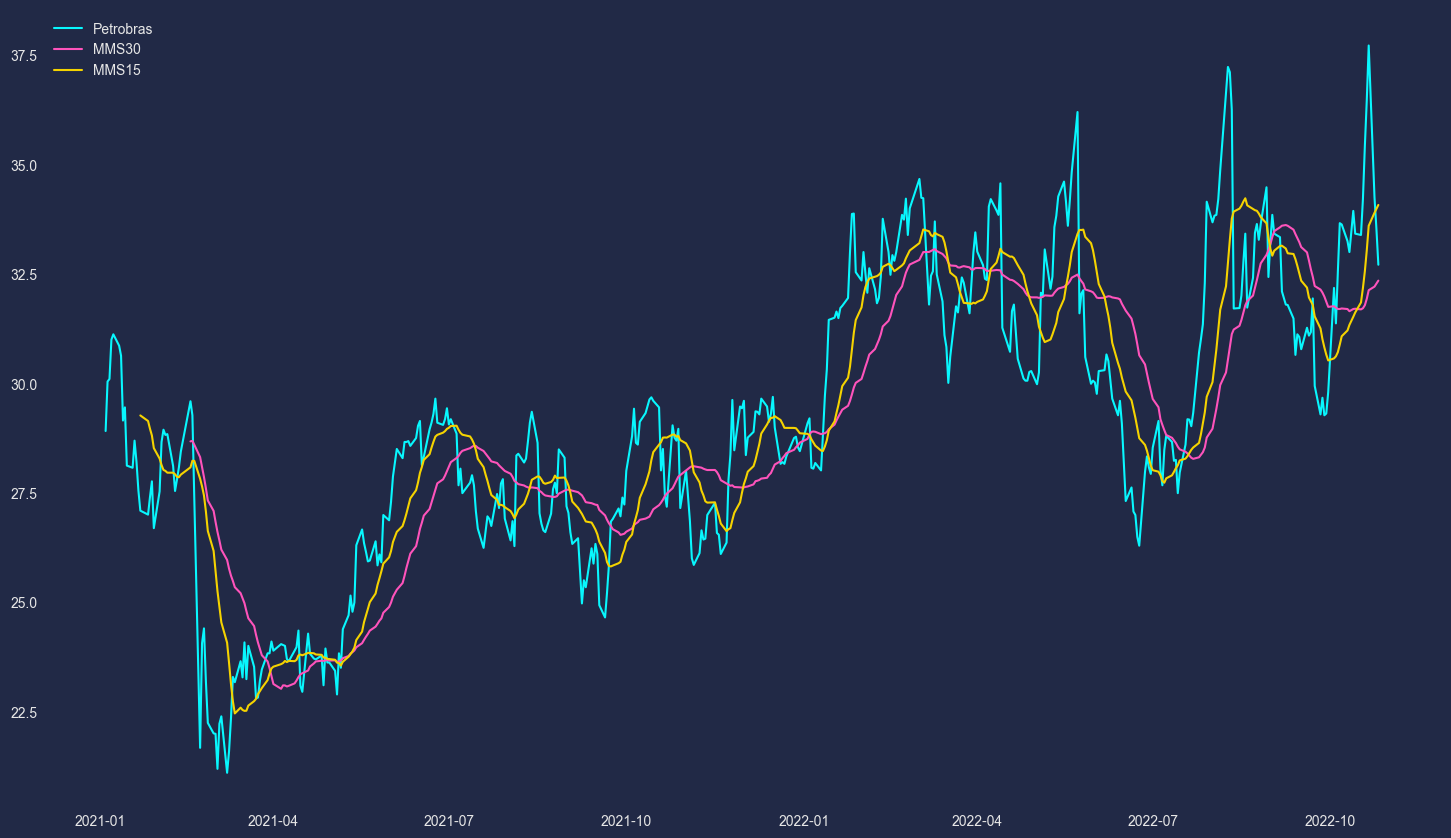

In [46]:
fig1 = plt.figure(figsize= (14, 8))

ax1 = fig1.add_axes([0, 0, 1, 1])

ax1.plot( petra_sa['Close'], label='Petrobras')
ax1.plot( petra_sa['Close'].rolling( window=30 ).mean(), label='MMS30' )
ax1.plot( petra_sa['Close'].rolling( window=15 ).mean(), label='MMS15' )

plt.style.use(style='cyberpunk')
plt.grid(False)
plt.legend()
plt.show()

In [47]:
petra_sa['MME30'] = petra_sa['Close'].ewm( span=30 ).mean()
petra_sa['MME30']

Date
2021-01-04    28.910000
2021-01-05    29.493834
2021-01-06    29.709504
2021-01-07    30.065083
2021-01-08    30.305102
                ...    
2022-10-20    32.737056
2022-10-21    33.058536
2022-10-24    33.135405
2022-10-25    33.160863
2022-10-26    33.131775
Name: MME30, Length: 453, dtype: float64

In [48]:
petra_sa = petra_sa.fillna(0)
petra_sa.head()

,High,Low,Open,Close,Volume,Adj Close,MME30
Date,,,,,,,
2021-01-04,29.18,28.530001,28.650000,28.910000,74719700.0,15.694896,28.910000
2021-01-05,30.18,28.240000,28.900000,30.040001,95181100.0,16.308359,29.493834
2021-01-06,30.90,30.049999,30.160000,30.100000,96562500.0,16.340931,29.709504
2021-01-07,31.15,30.340000,30.340000,31.000000,56171300.0,16.829531,30.065083
2021-01-08,31.76,30.350000,31.459999,31.120001,67136300.0,16.894680,30.305102


In [49]:
petra_sa = petra_sa.drop('MME30', axis=1)
petra_sa.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,29.180000,28.530001,28.650000,28.910000,74719700.0,15.694896
2021-01-05,30.180000,28.240000,28.900000,30.040001,95181100.0,16.308359
2021-01-06,30.900000,30.049999,30.160000,30.100000,96562500.0,16.340931
2021-01-07,31.150000,30.340000,30.340000,31.000000,56171300.0,16.829531
2021-01-08,31.760000,30.350000,31.459999,31.120001,67136300.0,16.894680
2021-01-11,31.059999,30.400000,30.610001,30.860001,48744700.0,16.753531
2021-01-12,31.559999,30.629999,31.120001,30.629999,65691900.0,16.628662
2021-01-13,30.860001,29.000000,30.680000,29.150000,93826600.0,15.825187
2021-01-14,29.670000,28.719999,29.170000,29.450001,50745400.0,15.988055


In [50]:
petra_sa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,29.180000,28.530001,28.650000,28.910000,74719700.0,15.694896
2021-01-05,30.180000,28.240000,28.900000,30.040001,95181100.0,16.308359
2021-01-06,30.900000,30.049999,30.160000,30.100000,96562500.0,16.340931
2021-01-07,31.150000,30.340000,30.340000,31.000000,56171300.0,16.829531
2021-01-08,31.760000,30.350000,31.459999,31.120001,67136300.0,16.894680
...,...,...,...,...,...,...
2022-10-20,36.549999,35.770000,36.099998,36.470001,114347400.0,36.470001
2022-10-21,38.389999,36.389999,36.450001,37.720001,139601400.0,37.720001
2022-10-24,36.820000,34.230000,36.500000,34.250000,142110900.0,34.250000


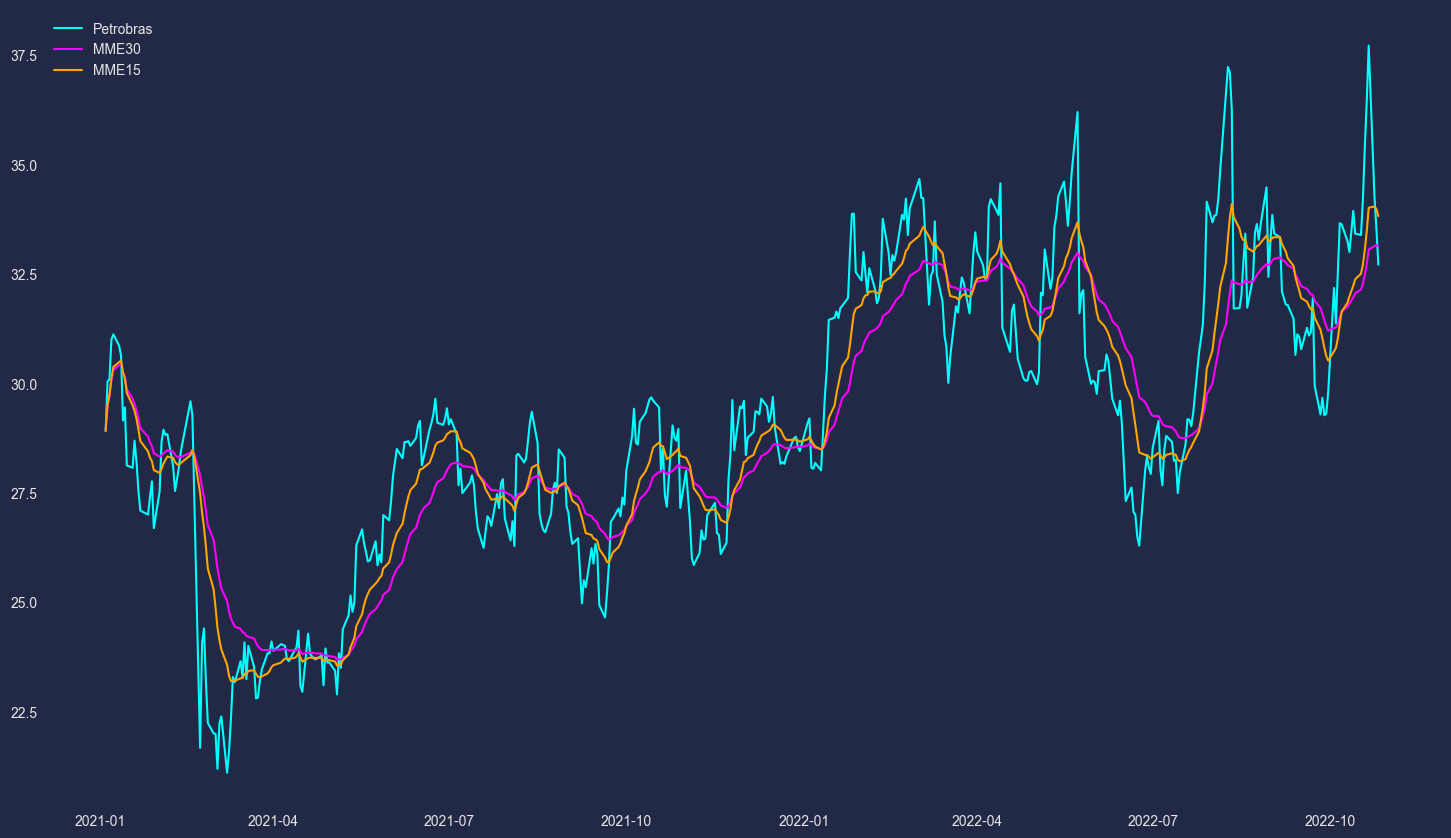

In [51]:
fig2 = plt.figure(figsize= (14, 8))

ax2 = fig2.add_axes([0, 0, 1, 1])

ax2.plot( petra_sa['Close'], label='Petrobras', color='cyan')
ax2.plot( petra_sa['Close'].ewm( span=30 ).mean(), label='MME30', color='magenta' )
ax2.plot( petra_sa['Close'].ewm( span=15 ).mean(), label='MME15', color='orange')

plt.style.use(style='cyberpunk')
plt.grid(False)
plt.legend()
plt.show()

In [52]:
# Média Móvel Simples dos ultimos 30 dias
petra_sa['MMS30'] = petra_sa['Close'].rolling( window=30 ).mean()

# Média Móvel Exponencial dos ultimos 30 dias
petra_sa['MME30'] = petra_sa['Close'].ewm( span=30 ).mean()

petra_sa = petra_sa.fillna(0)

petra_sa.tail()

,High,Low,Open,Close,Volume,Adj Close,MMS30,MME30
Date,,,,,,,,
2022-10-20,36.549999,35.770000,36.099998,36.470001,114347400.0,36.470001,31.930667,32.737056
2022-10-21,38.389999,36.389999,36.450001,37.720001,139601400.0,37.720001,32.128000,33.058536
2022-10-24,36.820000,34.230000,36.500000,34.250000,142110900.0,34.250000,32.210000,33.135405
2022-10-25,34.500000,33.209999,34.040001,33.529999,113161200.0,33.529999,32.278333,33.160863
2022-10-26,33.529999,31.900000,32.599998,32.709999,121334800.0,32.709999,32.347000,33.131775


,High,Low,Open,Close,Volume,Adj Close,MMS30,MME30
Date,,,,,,,,
2021-01-04,29.18,28.530001,28.650000,28.910000,74719700.0,15.694896,0.0,28.910000
2021-01-05,30.18,28.240000,28.900000,30.040001,95181100.0,16.308359,0.0,29.493834
2021-01-06,30.90,30.049999,30.160000,30.100000,96562500.0,16.340931,0.0,29.709504
2021-01-07,31.15,30.340000,30.340000,31.000000,56171300.0,16.829531,0.0,30.065083
2021-01-08,31.76,30.350000,31.459999,31.120001,67136300.0,16.894680,0.0,30.305102


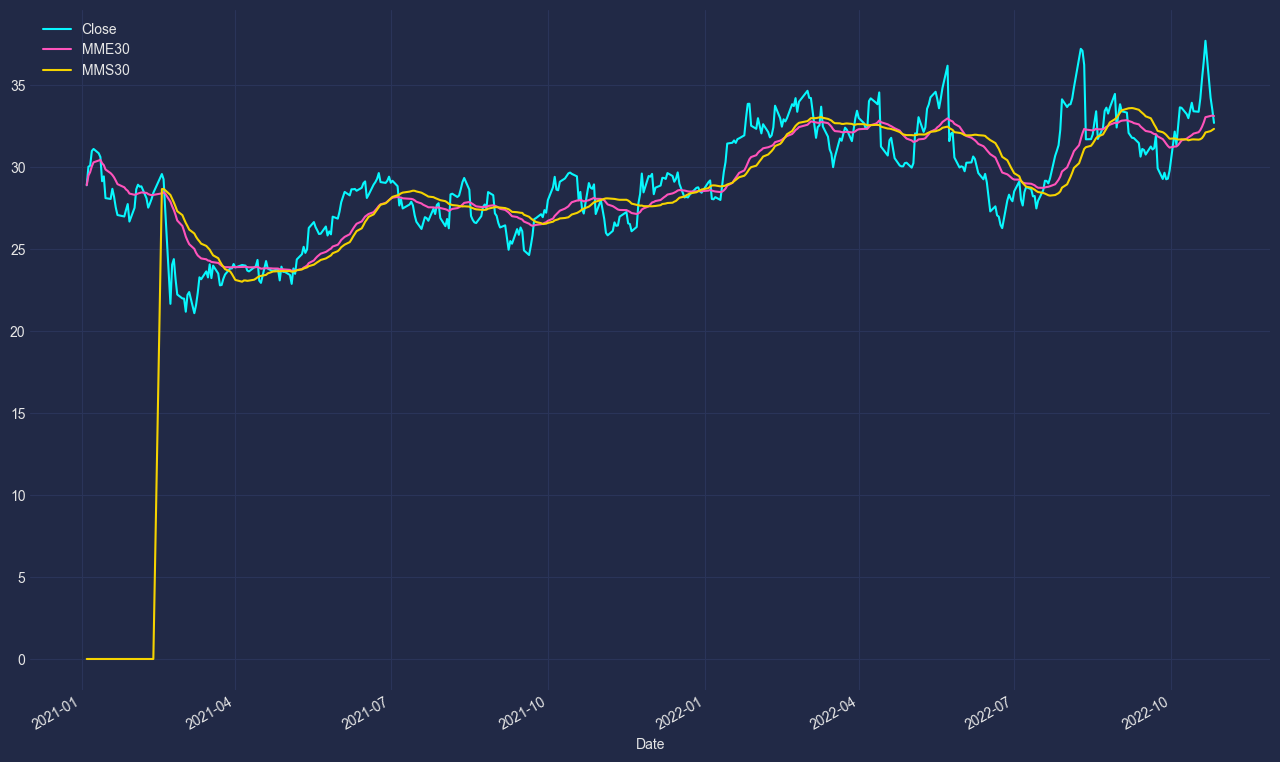

In [53]:
petra_sa[['Close', 'MME30','MMS30']].plot( figsize=(16, 10) )
petra_sa.head()

In [54]:
model = pdr.read_csv('Modelo.csv')
model.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
model.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
passengerId = model['PassengerId']
passengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [58]:
train = pdr.read_excel('train.xlsx')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [59]:
titanic = train.append(model, ignore_index=True)

C:\Users\wallison-santos\AppData\Local\Temp\ipykernel_5108\2433595353.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic = train.append(model, ignore_index=True)


In [60]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1782 non-null   int64  
 1   Survived     1782 non-null   int64  
 2   Pclass       1782 non-null   int64  
 3   Name         1782 non-null   object 
 4   Sex          1782 non-null   object 
 5   Age          1428 non-null   float64
 6   SibSp        1782 non-null   int64  
 7   Parch        1782 non-null   int64  
 8   Ticket       1782 non-null   object 
 9   Fare         1782 non-null   float64
 10  Cabin        408 non-null    object 
 11  Embarked     1778 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 167.2+ KB


In [61]:
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             354
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          4
dtype: int64

In [62]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [68]:
df = pd.DataFrame()

In [69]:
titanic['Survived'].nunique() # Apenas duas opções

2

In [70]:
titanic['Survived'].unique() # Valores que estão nesta coluna

array([0, 1], dtype=int64)

In [73]:
titanic['Survived'].value_counts() # Quantidade para os respectivos valores

0    1098
1     684
Name: Survived, dtype: int64

In [74]:
titanic['Sex'].value_counts()

male      1154
female     628
Name: Sex, dtype: int64

In [1]:
seaborn.countplot(data=titanic, x='Survived')
titanic.describe

NameError: name 'seaborn' is not defined